<a href="https://colab.research.google.com/github/talhaanwarch/IDDs_EEG_ML_classification/blob/master/electrode_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Packages

In this approach data is segmented and feature are calculated for each segment. Then these features are averaged

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
!pip install wfdb
!pip install mne
!pip install nitime
!pip install nolds

     |████████████████████████████████| 112kB 2.6MB/s 
     |████████████████████████████████| 163kB 6.9MB/s 
     |████████████████████████████████| 6.6MB 8.0MB/s 
     |████████████████████████████████| 9.1MB 2.8MB/s 
  Created wheel for nitime: filename=nitime-0.8.1-cp36-cp36m-linux_x86_64.whl size=4038229 sha256=052559147fcedb9626c4cd4501a3f0019947ee49fea986486ee921d7babe9ce3
  Stored in directory: /root/.cache/pip/wheels/74/02/c5/677c895b41dcaf4fd7c4ff436fbdf8a5d846ed90a0a3276073
Successfully built nitime


In [3]:
!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-0rgugeoi
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-0rgugeoi
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28121 sha256=3d42dcd16bbbc50e5599f7f163305ab1844cd0e08bd9c9d22af418b901891c66
  Stored in directory: /tmp/pip-ephem-wheel-cache-dikjl1x6/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-pj4l9yrv
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-pj4l9yrv
  Created wheel for entropy: filename=entropy-0.1.2-cp36-none-any.whl size=15609 sha256=d6e58f8a05db85eec1ae09a514350b7b6ab10397e10bea0e0d8e54842dab2dea
  Stored in directory: /tmp/pip-ephem-wheel-cache-p8iu72uk/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


# Download data

In [4]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fshy54ypyh-1.zip

--2020-06-17 01:52:57--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/fshy54ypyh-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.97.139
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.97.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34220065 (33M) [application/octet-stream]
Saving to: ‘fshy54ypyh-1.zip’

fshy54ypyh-1.zip    100%[===================>]  32.63M  7.54MB/s    in 4.3s    

2020-06-17 01:53:03 (7.54 MB/s) - ‘fshy54ypyh-1.zip’ saved [34220065/34220065]



In [5]:
%%capture 
!unzip fshy54ypyh-1.zip

# Read data

In [12]:
from glob import glob
import os
import mne
import re
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
import scipy.io


In [7]:
IDD='/content/Data/Data/CleanData/Data/Data/CleanData/CleanData_IDD'
TDC='/content/Data/CleanData/CleanData_TDC'
!rm '/content/Data/Data/CleanData/Data/Data/CleanData/CleanData_IDD/Rest/NDS001_Rest_CD(1).mat'

In [89]:
from scipy import signal
nyq = 0.5 * 128
l=0.1
low = l / nyq
high = 30 / nyq
b, a = signal.butter(3, [low,high], 'band')

In [117]:
IDD_rest=[]
for i in glob(IDD+'/Rest/*.mat'):
    data=scipy.io.loadmat(i)['clean_data'].T
    #data=signal.filtfilt(b, a, data.T).T 
    IDD_rest.append(data)

TDC_rest=[]
for i in glob(TDC+'/Rest/*.mat'):
    data=scipy.io.loadmat(i)['clean_data'].T
    #signal.filtfilt(b, a, data.T).T 
    TDC_rest.append(data)

In [118]:
len(IDD_rest),len(TDC_rest)

(7, 7)

In [119]:
print(IDD_rest[0].shape,TDC_rest[0].shape)

(15360, 14) (15360, 14)


In [120]:
X1=np.concatenate(TDC_rest)
X2=np.concatenate(IDD_rest)
X=np.concatenate((X1,X2))
X.shape

(215040, 14)

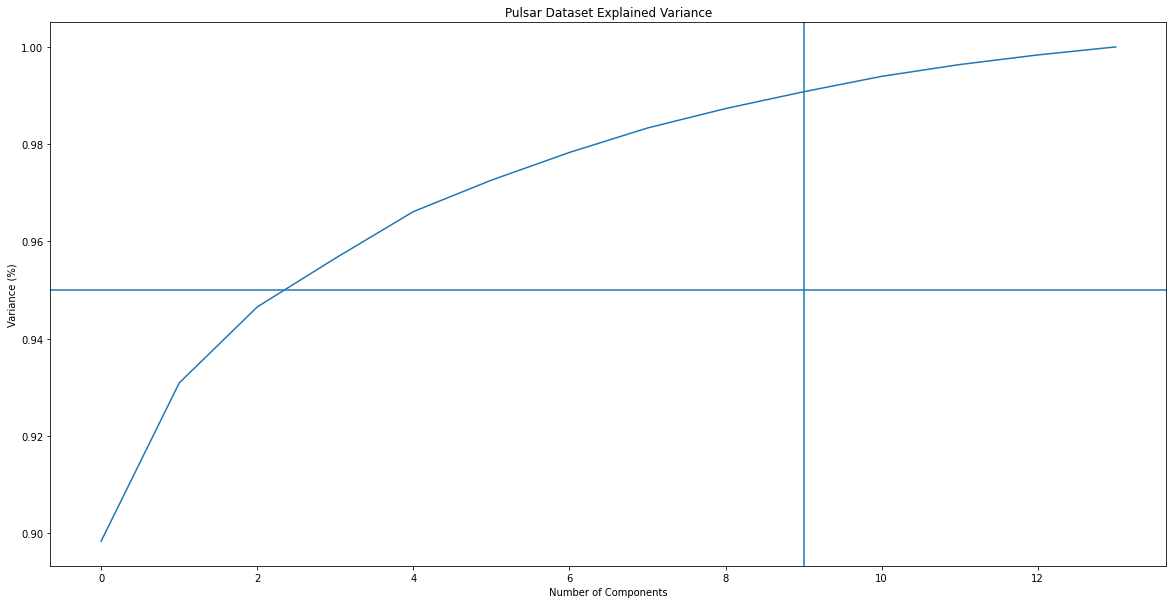

In [121]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
plt.figure(figsize=(20,10))
pca = PCA().fit(X)
plt.axhline(0.95)
plt.axvline(9)
#Plotting the Cumulative Summation of the Explained Variance
plt.plot(np.cumsum(pca.explained_variance_ratio_)[0:15])
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [122]:
channels=['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
df1 = pd.DataFrame.from_records(X)
df1.shape

(215040, 14)

In [123]:
df1.columns=channels
df1.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,0.017177,0.013487,0.017277,0.017432,0.016857,0.015235,0.016513,0.013696,0.010090,0.019376,0.015795,0.018716,0.017173,0.017015
1,11.776719,11.917749,12.872684,0.923477,13.427336,0.547594,-4.259877,0.759841,-2.806454,4.187346,13.262837,-8.219603,17.134083,10.771775
2,18.827591,21.996574,16.454605,-1.919405,26.220251,5.710616,-6.126770,3.486717,-11.544127,9.533499,20.317955,-10.903939,23.706966,16.450661
3,17.686882,25.750349,9.646216,-5.998585,34.292828,12.495939,-7.681332,5.682459,-22.623190,13.588994,17.264349,-6.928990,16.224974,13.613335
4,8.581623,19.869001,-1.007934,-5.672145,33.614166,14.647127,-12.302618,3.532815,-27.438499,12.840090,5.281331,0.980114,1.181791,2.875865


In [124]:
ch=2

In [125]:
X_1=df1.var()
idx=X_1.sort_values()[-ch::].index

print(idx)
ch=len(idx)

Index(['T8', 'F8'], dtype='object')


In [126]:
indx=[]
for i in idx:
  indx.append(channels.index(i))
indx=np.array(indx)  

In [127]:
indx

array([ 9, 12])

In [128]:
IDD_reshaped=[]
TDC_reshaped=[]
for i in IDD_rest:
  IDD_reshaped.append(i.reshape(-1,512,14)[:,:,indx])
for i in TDC_rest:
  TDC_reshaped.append(i.reshape(-1,512,14)[:,:,indx])

In [129]:
len(IDD_reshaped),len(TDC_reshaped)

(7, 7)

In [130]:
IDD_reshaped[0].shape

(30, 512, 2)

# Libraries

In [131]:
from scipy import stats
import pyeeg
from entropy import *
import pywt
from nitime import algorithms as alg
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import nolds
np.warnings.filterwarnings('ignore')

# Main Features

In [132]:

from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)

def argminim(data):
      return np.argmin(data,axis=0)


def argmaxim(data):
      return np.argmax(data,axis=0)

def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


def lziv_complex(data):
    result=[]
    for i in data.T:
        result.append(lziv_complexity(i))
    return np.array(result)

        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),argminim(data),argmaxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),teager(data),lziv_complex(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)

In [133]:
features1=[]
for f in IDD_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))

In [134]:
features2=[]
for f in TDC_reshaped:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [135]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)

y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))
X.shape,y.shape

((14, 52), (14,))

In [136]:
feature=X.copy()
label=y.copy()
from sklearn.preprocessing import scale,maxabs_scale
feature=scale(feature)

In [146]:
 from sklearn.model_selection import KFold
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y):
    Cs = [ 0.1, 1, 10,15,20,25,30,40,50,60,70,100,120]
    gammas = [0.0001,0.0005,0.001,0.005,0.008, 0.01, 0.1,0.3,0.5, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=KFold(14))
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_score_


svc_param_selection(feature,label)

0.7857142857142857

In [147]:
from sklearn.tree import DecisionTreeClassifier
def dtree_param_selection(X,y):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_features':["auto", "sqrt", "log2"],'max_depth': np.arange(2, 20),'random_state':[10,20,30,40,50]}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=KFold(14))
    #fit model to data
    dtree_gscv.fit(X, y)
    #print(dtree_gscv.best_score_)
    #print(dtree_gscv.best_estimator_)
    return dtree_gscv.best_score_
dtree_param_selection(feature,label)

0.7857142857142857

In [148]:
feature_list=['mean','std','ptp','var','minim','maxim','argmin','argmax','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','teager','lziv_complex',
'hjorth_mobility','hjorth_complexity']

In [154]:
feature_selected=[]
feat_non_sorted=[]
score_non_sorted=[]
for i ,j in zip(range(0,feature.shape[1],ch),feature_list):
  acc=dtree_param_selection(feature[:,i:i+ch],label)
  print(j," : ",acc)
  feat_non_sorted.append(j)
  score_non_sorted.append(acc)

mean  :  0.5
std  :  0.7857142857142857
ptp  :  0.7142857142857143
var  :  0.7857142857142857
minim  :  0.9285714285714286
maxim  :  0.6428571428571429
argmin  :  0.7857142857142857
argmax  :  0.42857142857142855
mean_square  :  0.7857142857142857
rms  :  0.7857142857142857
abs_diffs_signal  :  0.9285714285714286
skewness  :  0.5
kurtosis  :  0.35714285714285715
zero_crossing  :  0.7142857142857143
app_epy  :  0.8571428571428571
perm_epy  :  0.7142857142857143
svd_epy  :  0.6428571428571429
spectral_epy  :  0.8571428571428571
sample_epy  :  0.8571428571428571
katz  :  0.7857142857142857
higuchi  :  0.5
petrosian  :  0.7142857142857143
teager  :  0.7857142857142857
lziv_complex  :  0.7857142857142857
hjorth_mobility  :  0.5714285714285714
hjorth_complexity  :  0.42857142857142855


In [155]:
print(feat_non_sorted)
print(score_non_sorted)

['mean', 'std', 'ptp', 'var', 'minim', 'maxim', 'argmin', 'argmax', 'mean_square', 'rms', 'abs_diffs_signal', 'skewness', 'kurtosis', 'zero_crossing', 'app_epy', 'perm_epy', 'svd_epy', 'spectral_epy', 'sample_epy', 'katz', 'higuchi', 'petrosian', 'teager', 'lziv_complex', 'hjorth_mobility', 'hjorth_complexity']
[0.5, 0.7857142857142857, 0.7142857142857143, 0.7857142857142857, 0.9285714285714286, 0.6428571428571429, 0.7857142857142857, 0.42857142857142855, 0.7857142857142857, 0.7857142857142857, 0.9285714285714286, 0.5, 0.35714285714285715, 0.7142857142857143, 0.8571428571428571, 0.7142857142857143, 0.6428571428571429, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.5, 0.7142857142857143, 0.7857142857142857, 0.7857142857142857, 0.5714285714285714, 0.42857142857142855]


In [156]:
score,feat  = zip(*sorted(zip(score_non_sorted, feat_non_sorted),reverse=True))


In [157]:
print(feat)
print(score)

('minim', 'abs_diffs_signal', 'spectral_epy', 'sample_epy', 'app_epy', 'var', 'teager', 'std', 'rms', 'mean_square', 'lziv_complex', 'katz', 'argmin', 'zero_crossing', 'ptp', 'petrosian', 'perm_epy', 'svd_epy', 'maxim', 'hjorth_mobility', 'skewness', 'mean', 'higuchi', 'hjorth_complexity', 'argmax', 'kurtosis')
(0.9285714285714286, 0.9285714285714286, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5, 0.5, 0.5, 0.42857142857142855, 0.42857142857142855, 0.35714285714285715)


In [158]:
def del_item(a, b):
     return [x for x in a if x not in b]



#skf = StratifiedKFold(n_splits=10, random_state=2020, shuffle=False)
acc=0
deleted_item=[]
for i in range(1,20):
  feature_selected=list(feat[:i])
  # feature_selected=del_item(feature_selected,deleted_item)

  X_good=[]
  for key,val in zip(feature_list,range(0,feature.shape[1],ch)):
      for fe in feature_selected:
          if key==fe:     
              #print('key',key,'value',val,":",val+ch) 
              X_good.append(feature[:,val:val+ch])
  good_feature=np.concatenate((X_good),axis=1)
  #good_feature=np.concatenate((good_feature,non_eeg),1)


  acc_new=dtree_param_selection(good_feature,label)
  print(i,' : ', acc_new)

  # print(acc_new, good_feature.shape)
  # if acc_new<(acc-0.01):
  #   deleted_item.append(feature_selected.pop())
  #   print('del item',deleted_item)
  # else:
  #   acc=acc_new


1  :  0.9285714285714286
2  :  0.9285714285714286
3  :  0.9285714285714286
4  :  0.8571428571428571
5  :  0.8571428571428571
6  :  0.8571428571428571
7  :  0.8571428571428571
8  :  0.8571428571428571
9  :  0.8571428571428571
10  :  0.8571428571428571
11  :  0.7857142857142857
12  :  0.7857142857142857
13  :  0.8571428571428571
14  :  0.8571428571428571
15  :  0.8571428571428571
16  :  0.8571428571428571
17  :  0.8571428571428571
18  :  0.8571428571428571
19  :  0.9285714285714286
